# Data Cleaning Project

## About: 
The data set used in this data cleaning project is a set of automobile data from eBay Kleinanzeigen, a classifieds section of the German eBay website. DataQuest provided a slimmed down version of the original dataset for educational purposes. 

### Process: 
The data cleaning process will be broken down into numerous parts and sub-parts: 
1. Part 1: Import data
    - Import using pandas
    - Save as a new dataset
2. Part 2: Examine data
    - Look at how data is presented
    - Create a plan to clean the data
    - Take notes of each aspect of the data needs to be fixed or changed
    - Establish uniformity standards so the data set is uniform throughout 
3. Part 3: Clean Data
    - Systematically clean the data 
4. Part 4: Analyze the data
    - Plan for analysis
    - Execute code and find insights 
5. Part 5: Conclusion

## Part 1: import data

In [1]:
#import numpy and pandas

import numpy as np
import pandas as pd
import datetime


In [2]:
#import and read the dataset and assign to variable 'autos'

autos = pd.read_csv('autos.csv', encoding='Latin-1')

## Part 2: examine data

In [3]:
#take a look at the data and become familiar with it. Note any abnormalities or formating changes. 

autos.info()
autos.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
46426,2016-03-07 20:50:36,Volkswagen_Eos_2.0_TDI_DPF,privat,Angebot,"$8,950",test,cabrio,2008,automatik,140,eos,"125,000km",7,diesel,volkswagen,nein,2016-03-07 00:00:00,0,88400,2016-03-09 20:45:59
8547,2016-03-21 23:58:02,Volkswagen_Golf_2.0_16V_GTI_Edition,privat,Angebot,"$2,300",test,limousine,1996,manuell,150,golf,"150,000km",3,benzin,volkswagen,nein,2016-03-21 00:00:00,0,73116,2016-04-05 15:17:45
16392,2016-03-11 10:39:38,Corsa_B_zu_verkaufen,privat,Angebot,$650,test,kleinwagen,2000,manuell,54,corsa,"150,000km",7,benzin,opel,NaN,2016-03-11 00:00:00,0,45896,2016-04-04 19:46:39
19060,2016-03-12 14:57:53,VW_Golf_4__1.8_Automatik,privat,Angebot,"$2,000",test,kleinwagen,1998,automatik,125,golf,"150,000km",5,benzin,volkswagen,nein,2016-03-12 00:00:00,0,45663,2016-03-12 14:57:53


In [4]:
#examing the 'offerType' column because it seems that all the values are the same

autos['offerType'].value_counts()

Angebot    49999
Gesuch         1
Name: offerType, dtype: int64

In [5]:
#examine the 'seller' column because it seems that all the values are the same

autos['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

After initially examining the data set the following will need to be fixed or adjusted:
1. change all column names to snake_case
2. delete 'offer_type' column and 'seller' column because all their data is uniform and will not aid in analysis
3. 'price' column remove the '$' and ',' symbols, convert to type int
4. 'odometer' column remove the 'km' and ',' and change type to int
5. look for outliers in the columns with int type data specifically 'price' and 'odometer' columns
6. examine the registration year column and remove rows where dates seem unrealistic
7. identify categorical data that uses german words, translate them and map the values to their english counterparts
8. add in the time zone data to all date/time related columns

## Part 3: clean the data

Using the checklist above conduct the cleaning in order: 

### Step 1: change column names to snake case

In [6]:
#convert col names to snake case and add more detail lto name if necessary i.e. include units

autos.rename(columns={'dateCrawled':'date_crawled','offerType':'offer_type', 
                      'vehicleType':'vehicle_type', 'powerPS':'power_ps', 'fuelType':'fuel_type', 
                      'yearOfRegistration': 'registration_year', 'monthOfRegistration':'registration_month', 
                      'notRepairedDamage':'unrepaired_damage', 'dateCreated':'ad_created', 'odometer':'odometer_km',
                      'nrOfPictures':'nr_of_pictures', 'postalCode':'postal_code', 'lastSeen':'last_seen'}, inplace=True)

#check the output of the code above

autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

### Step 2: drop 'offer_type' and 'seller' columns

In [7]:
#data in 'seller' and 'offer_type' cols are all the same values so they provide no value to analysis

autos = autos.drop(['seller', 'offer_type'], axis=1)

### Step 3: Remove '$' and ',' from 'price' col and convert to type int

In [8]:
autos['price'] = autos['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)

### Step 4: remove 'km' units from odometer_km col and convert to type: int

In [9]:
autos['odometer_km'] = autos['odometer_km'].str.replace('km', '').str.replace(',', '').astype(int)

### Step 5: search for and remove outliers in price and odometer_km cols

In [10]:
#look for prices that seem unreasonable

autos['price'].sort_values(ascending=False).head(10)

39705    99999999
42221    27322222
27371    12345678
39377    12345678
47598    12345678
2897     11111111
24384    11111111
11137    10000000
47634     3890000
7814      1300000
Name: price, dtype: int64

In [11]:
#remove all rows where the price is an outlier
#use series.describe to get the price statistics

autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [12]:
#Create a fliter to remove rows with price outliers
#determine outliers outlier formula 75%+ 1.5(IQR) or 25% - 1.5(IQR)

high_price_iqr = autos['price'] < 7200 + (1.5 * (7200 - 1100))
low_price_iqr = autos['price'] > 1100 - (1.5 * (7200 - 1100))
price_range = high_price_iqr & low_price_iqr
autos = autos[price_range]

#check to see how many rows were eliminated

autos['price'].shape

#the price column originally had 50000 rows and now contains 46207 rows which means 3793 rows were 
#removed with price outliers

hi_lo_prices = autos['price'].sort_values(ascending=False)
print(hi_lo_prices)

3472     16333
41664    16333
46626    16300
11141    16300
8129     16300
         ...  
17113        0
3115         0
17029        0
16973        0
24960        0
Name: price, Length: 46207, dtype: int64


In [13]:
#remove all rows where the odometer is an outlier

autos['odometer_km'].describe()

#the odometers col does not contain any outliers
#the min is 5000km and the max is 150000km which both seem like reasonable odometer readings

count     46207.000000
mean     129613.803103
std       36802.093553
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [14]:
#examine the 'registration_year' column

autos['registration_year'].describe()

#there are years listed that do not make sense
#filter out anything before 1930 and after 2016 (year data collected)

count    46207.000000
mean      2004.342416
std         96.234804
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       9999.000000
Name: registration_year, dtype: float64

In [15]:
#filter out rows that have years that are outside 1950-2016

too_early = autos['registration_year'] >= 1930
too_late = autos['registration_year'] <= 2016
good_years = too_early & too_late
autos = autos[good_years]
autos['registration_year'].describe()

#started with 46207 rows and ended with 44275, so a delta of 1932 rows removed

count    44275.000000
mean      2002.315663
std          6.759523
min       1934.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2016.000000
Name: registration_year, dtype: float64

### Step 6: change german words to english

Steps to translate German to English
1. create a list of unique values
2. make a corresponding list of english words
3. make a dictionary with German types as key and English types as value
4. use the dictionary to do a one for one swap in the column

In [17]:
#translate the 'vehicle_type' column

ger_vic_type = autos['vehicle_type'].unique().tolist()
eng_vic_type = ['bus', 'limo', 'compact', 'cargo', 'nan', 'coupe', 'suv', 'convertible', 'other']
interpreter = dict(zip(ger_vic_type, eng_vic_type))
autos['vehicle_type'].replace(to_replace=interpreter, inplace=True)

In [18]:
# translate the 'fuel_type' column

ger_fuel_type = autos['fuel_type'].unique().tolist()
eng_fuel_type = ['lpg', 'petrol', 'diesel', 'NaN', 'cng', 'hybrid', 'electric', 'other']
interp_fuels = dict(zip(ger_fuel_type, eng_fuel_type))
autos['fuel_type'].replace(to_replace=interp_fuels, inplace=True)

In [19]:
#translate the 'gearbox' column

ger_gearbox = autos['gearbox'].unique().tolist()
eng_gearbox = ['manual', 'automatic', 'NaN']
interp_gearbox = dict(zip(ger_gearbox, eng_gearbox))
autos['gearbox'].replace(to_replace=interp_gearbox, inplace=True)

In [20]:
#translate the 'unrepaired_damage' column

ger_damage = autos['unrepaired_damage'].unique().tolist()
eng_damage = ['no', 'NaN', 'yes']
interp_damage = dict(zip(ger_damage, eng_damage))
autos['unrepaired_damage'].replace(to_replace=interp_damage, inplace=True)

In [21]:
autos.head(5)

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limo,1997,automatic,286,7er,150000,6,petrol,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limo,2009,manual,102,golf,70000,7,petrol,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,compact,2007,automatic,71,fortwo,70000,6,petrol,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,cargo,2003,manual,0,focus,150000,7,petrol,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Step 7: add time zone information to the date/time columns

In [22]:
autos[['date_crawled', 'ad_created', 'last_seen']] = autos[['date_crawled', 'ad_created', 'last_seen']].apply(pd.to_datetime, utc=True)

In [23]:
autos['date_crawled'] = autos['date_crawled'].dt.tz_convert('Europe/Berlin')

In [24]:
autos['ad_created'] = autos['ad_created'].dt.tz_convert('Europe/Berlin')

In [25]:
autos['last_seen'] = autos['last_seen'].dt.tz_convert('Europe/Berlin')

### Conclusion to Data Cleaning Process

This concludes the data cleaning portion of this project. Over all the process was to examine the data, remove unnecessary data, reformat data for uniformity, remove outliers, translate many columns from German to English, create uniform datatime data with timezone information. 

The dataset 'autos' is now ready for analysis

## Part 4: Analysis

### Primary analysis goals:
- To determine the most popular car brands
- To determine which brand has the highest average selling price
- To determine the most important factors that affect price. i.e. brand/model, damage, odometer, posting time etc.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: determine the most common brands and their average price and mileage

<Figure size 1800x1080 with 0 Axes>

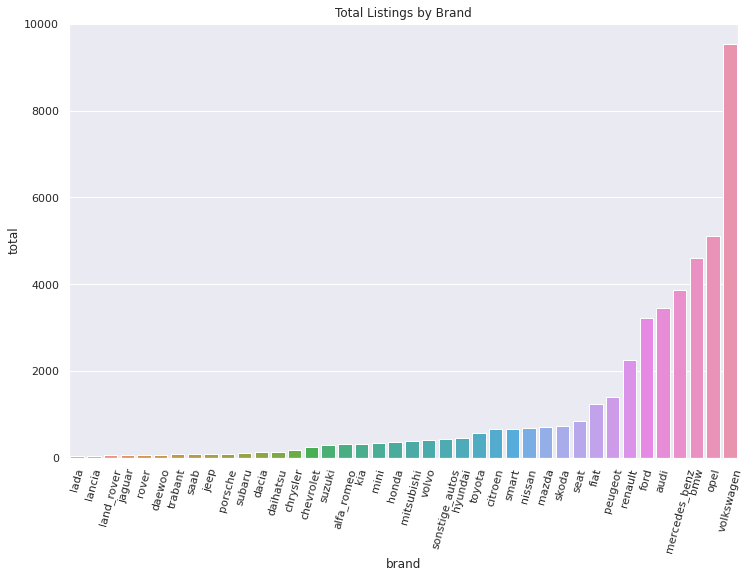

In [44]:
### insert chart showing most popular brands based on the total number of listings per brand

brandz = {}
for brand in autos['brand']:
    if brand in brandz: 
        brandz[brand] += 1 
    else: 
        brandz[brand] = 1
        
brandz = pd.DataFrame(sorted(brandz.items(), key=lambda item: item[1]))
brandz.columns=['brand', 'total']

plt.figure(figsize=(25, 15))
sns.set_theme()
plt.figure(figsize = (12,8))
sns.barplot(x='brand', y='total', data=brandz)
plt.title('Total Listings by Brand')
plt.xticks(rotation=75)
plt.show()

Analysis: per the graph above the most commonly listed brand is Volkswagen with well over 9000 listings. the next most popular is Opel with around 5000 listings, followed by BMW, Mercedes-Benz, Audi and Ford. The latter of which has just over 2000 listings. 

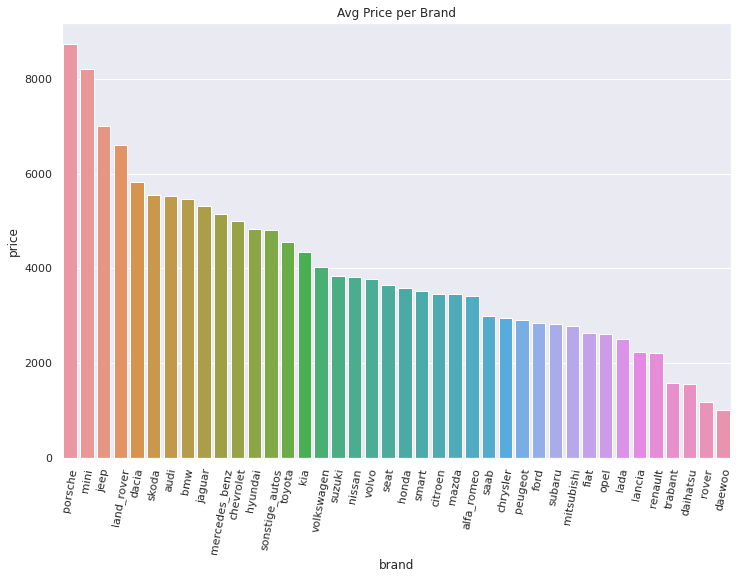

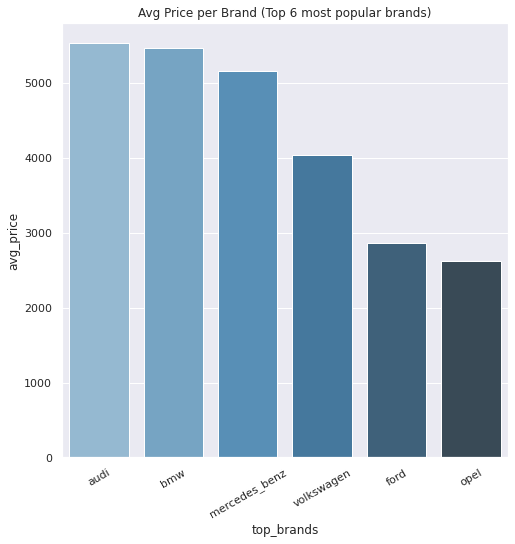

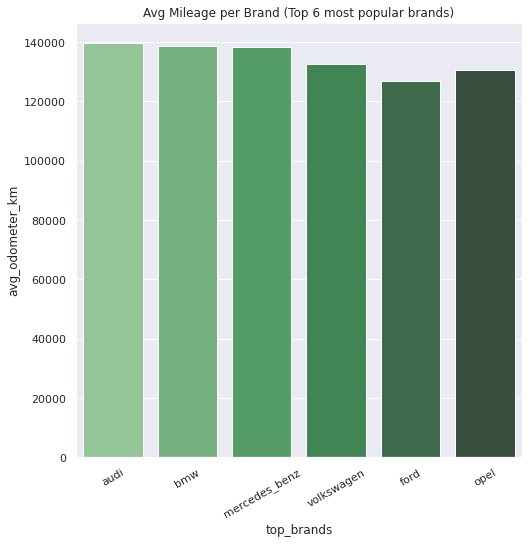

In [49]:
#find the average price and average odometer by brand
brand_avgs = autos.groupby(by='brand').mean()[['price', 'odometer_km']].reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize = (12,8))
sns.barplot(data=brand_avgs, x='brand', y='price')  
plt.title('Avg Price per Brand')
plt.xticks(rotation=80)
plt.show()

#filter the dataframe for the top 6 brands
top_brands = ['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford']

#filter the dataframe to get a new dataframe with brand, avg price, and avg odometer.
top_6_avg = brand_avgs[brand_avgs['brand'].isin(top_brands)].reset_index().drop('index', axis=1)

#rename the columns
top_6_avg.rename(columns={'brand':'top_brands', 'price':'avg_price', 'odometer_km':'avg_odometer_km'}, inplace=True)

plt.figure(figsize = (8,8))
sns.barplot(data=top_6_avg, x='top_brands', y='avg_price', palette="Blues_d")  
plt.title('Avg Price per Brand (Top 6 most popular brands)')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize = (8,8))
sns.barplot(data=top_6_avg, x='top_brands', y='avg_odometer_km', palette="Greens_d")  
plt.title('Avg Mileage per Brand (Top 6 most popular brands)')
plt.xticks(rotation=30)
plt.show()

### Step 3: compare prices of damaged vs. non-damaged cars

<Figure size 1080x1080 with 0 Axes>

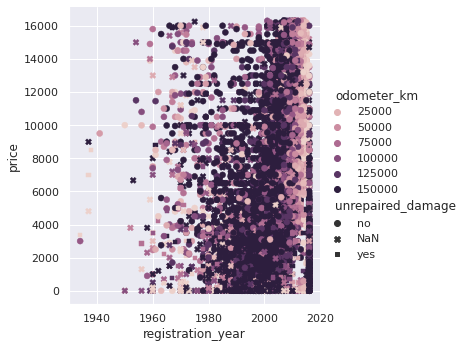

In [54]:

plt.figure(figsize = (15,15))

sns.relplot(data=autos, x='registration_year', y='price', hue='odometer_km', style='unrepaired_damage', marker=True)
plt.show()

### Step 4: Correlations

In [61]:
#make a correlation matrix
corr_df = autos[['price', 'registration_year', 'odometer_km']]
corr_mtx = corr_df.corr(method='pearson')
print(corr_mtx)

                      price  registration_year  odometer_km
price              1.000000           0.428941    -0.292724
registration_year  0.428941           1.000000    -0.185184
odometer_km       -0.292724          -0.185184     1.000000


## Part 5: Conclusion

The purpose of this exercise was to explore the data cleaning process in depth using the pandas library. In addition there was preliminary exploration using the matplotlib and seaborn libraries to do data visualizations to aid in data exploration and analysis. 

See the data cleaning section for the conclusion of the data cleaning process. 

The analysis showed us the most popular brands based on the number of listings in the data set. We also determined what the average price was for each brand of car. We conclude that the most expensive car brands were not necessarily the most popular brands. Volkswagen, Opel, and BMW were the most popular brands by listing, but Porsche, Mini and Jeep were the most expensive brands. It seemed that there was little correlation between odometer setting and price, and little variation in average odometer by brand. The strongest correlation to price was registration year. They were positively correlated but the correlation was still relatively weak. 